<a href="https://colab.research.google.com/github/serrve1/ubion_project1/blob/main/%EC%9D%BC%EB%B6%80%ED%94%BC%EC%B2%98%EC%9E%AC%EC%A1%B0%EC%A0%95(v1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import pandas as pd
import numpy as np

In [21]:
# 비재무 피쳐인 주가(12월말 기준), 평균유통주식수를 이용
# 매출액 (PSR),  당기순이익(PER), 평균총자본(PBR), 현금흐름(PCR)
#
path ='/content/drive/MyDrive/프로젝트2/데이터수집/새로운피쳐추가.csv'

df = pd.read_csv(path, encoding='cp949')
df.head()
print(f"전체 기업의 수 기업의 수 : {len(df['거래소코드'].unique())}")
print(f"원본 행의 수 : {len(df)}")

전체 기업의 수 기업의 수 : 2364
원본 행의 수 : 25125


In [22]:
df.head()

,회사명,거래소코드,회계년도,종가(원),매출액(수익)(*)(IFRS)(천원),매출액(수익)(*)(IFRS연결)(천원),계속영업이익(손실)(IFRS)(천원),계속영업이익(손실)(IFRS연결)(천원),당기순이익(손실)(IFRS)(천원),당기순이익(손실)(IFRS연결)(천원),...,* 발행한 주식총수(*)(IFRS)(천원),* 발행한 주식총수(*)(IFRS연결)(천원),비유동자산(*)(IFRS)(천원),비유동자산(*)(IFRS연결)(천원),유동자산(*)(IFRS)(천원),유동자산(*)(IFRS연결)(천원),유형자산(*)(IFRS)(천원),유형자산(*)(IFRS연결)(천원),영업활동으로 인한 현금흐름(간접법)(*)(IFRS)(천원),영업활동으로 인한 현금흐름(간접법)(*)(IFRS연결)(천원)
0,(주)CMG제약,58820,2011/12,785.0,17751704.0,17751704.0,-1264488.0,-1508282.0,-1264488.0,-1508282.0,...,43693200.0,43693200.0,12283654.0,11964031.0,15264885.0,15341167.0,9652599.0,9707759.0,-2488268.0,-2560438.0
1,(주)CMG제약,58820,2012/12,1330.0,16255389.0,16255389.0,-6892739.0,-6660149.0,-6892739.0,-6660149.0,...,66025540.0,66025540.0,9915161.0,9998822.0,47073443.0,47109213.0,9264142.0,9307482.0,-1453276.0,-1572581.0
2,(주)CMG제약,58820,2013/12,932.0,20322140.0,20402140.0,350267.0,311190.0,335258.0,296181.0,...,86626866.0,86626866.0,17702754.0,17702864.0,38258866.0,38209699.0,10805092.0,10805092.0,-3891420.0,-3939013.0
3,(주)CMG제약,58820,2014/12,912.0,22752584.0,22752584.0,171502.0,158039.0,171502.0,158039.0,...,86626866.0,86626866.0,29767275.0,29767385.0,28359823.0,28300941.0,18833775.0,18833775.0,730447.0,724893.0
4,(주)CMG제약,58820,2015/12,2110.0,27041894.0,27041894.0,-3648668.0,-3650091.0,-3648668.0,-3650091.0,...,88297244.0,88297244.0,30261207.0,30261207.0,26330765.0,26271614.0,17822468.0,17822468.0,2411254.0,2410205.0


In [23]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '종가(원)', '매출액(수익)(*)(IFRS)(천원)',
       '매출액(수익)(*)(IFRS연결)(천원)', '계속영업이익(손실)(IFRS)(천원)',
       '계속영업이익(손실)(IFRS연결)(천원)', '당기순이익(손실)(IFRS)(천원)',
       '당기순이익(손실)(IFRS연결)(천원)', '자산(*)(IFRS)(천원)', '자산(*)(IFRS연결)(천원)',
       '자본(*)(IFRS)(천원)', '자본(*)(IFRS연결)(천원)', '부채(*)(IFRS)(천원)',
       '부채(*)(IFRS연결)(천원)', '* 발행한 주식총수(*)(IFRS)(천원)',
       '* 발행한 주식총수(*)(IFRS연결)(천원)', '비유동자산(*)(IFRS)(천원)',
       '비유동자산(*)(IFRS연결)(천원)', '유동자산(*)(IFRS)(천원)', '유동자산(*)(IFRS연결)(천원)',
       '유형자산(*)(IFRS)(천원)', '유형자산(*)(IFRS연결)(천원)',
       '영업활동으로 인한 현금흐름(간접법)(*)(IFRS)(천원)',
       '영업활동으로 인한 현금흐름(간접법)(*)(IFRS연결)(천원)'],
      dtype='object')

In [24]:
df.isnull().sum()

회사명                                      0
거래소코드                                    0
회계년도                                     0
종가(원)                                 3749
매출액(수익)(*)(IFRS)(천원)                  2031
매출액(수익)(*)(IFRS연결)(천원)                7307
계속영업이익(손실)(IFRS)(천원)                  2031
계속영업이익(손실)(IFRS연결)(천원)                7307
당기순이익(손실)(IFRS)(천원)                   2031
당기순이익(손실)(IFRS연결)(천원)                 7307
자산(*)(IFRS)(천원)                       2031
자산(*)(IFRS연결)(천원)                     7307
자본(*)(IFRS)(천원)                       2031
자본(*)(IFRS연결)(천원)                     7307
부채(*)(IFRS)(천원)                       2031
부채(*)(IFRS연결)(천원)                     7307
* 발행한 주식총수(*)(IFRS)(천원)               2031
* 발행한 주식총수(*)(IFRS연결)(천원)             7307
비유동자산(*)(IFRS)(천원)                    2031
비유동자산(*)(IFRS연결)(천원)                  7307
유동자산(*)(IFRS)(천원)                     2031
유동자산(*)(IFRS연결)(천원)                   7307
유형자산(*)(IFRS)(천원)                     2031
유형자산(*)(IFR

In [25]:
# 1순위는 연결이고, 연결이 없는 경우에는 개별을 적용
list_ = ['회사명','거래소코드','회계년도','종가(원)','매출액','영업이익','당기순이익','자산','자본','부채','발행주식수','비유동자산','유동자산','유형자산','영업활동으로인한 현금흐름']

df['발행주식수'] = df['* 발행한 주식총수(*)(IFRS연결)(천원)']
df['발행주식수'].fillna(df['* 발행한 주식총수(*)(IFRS)(천원)'], inplace = True)

df['매출액'] = df['매출액(수익)(*)(IFRS연결)(천원)']*1000
df['매출액'].fillna(df['매출액(수익)(*)(IFRS)(천원)']*1000, inplace = True)

df['영업이익'] = df['계속영업이익(손실)(IFRS연결)(천원)']*1000
df['영업이익'].fillna(df['계속영업이익(손실)(IFRS)(천원)']*1000, inplace = True)

df['당기순이익'] = df['당기순이익(손실)(IFRS연결)(천원)']*1000
df['당기순이익'].fillna(df['당기순이익(손실)(IFRS)(천원)']*1000, inplace = True)

df['자산'] = df['자산(*)(IFRS연결)(천원)']*1000
df['자산'].fillna(df['자산(*)(IFRS)(천원)']*1000, inplace = True)

df['자본'] = df['자본(*)(IFRS연결)(천원)']*1000
df['자본'].fillna(df['자본(*)(IFRS)(천원)']*1000, inplace = True)

df['부채'] = df['부채(*)(IFRS연결)(천원)']*1000
df['부채'].fillna(df['부채(*)(IFRS)(천원)']*1000, inplace = True)

df['비유동자산'] = df['비유동자산(*)(IFRS연결)(천원)']*1000
df['비유동자산'].fillna(df['비유동자산(*)(IFRS)(천원)']*1000, inplace = True)

df['유동자산'] = df['유동자산(*)(IFRS연결)(천원)']*1000
df['유동자산'].fillna(df['유동자산(*)(IFRS)(천원)']*1000, inplace = True)

df['유형자산'] = df['유형자산(*)(IFRS연결)(천원)']*1000
df['유형자산'].fillna(df['유형자산(*)(IFRS)(천원)']*1000, inplace = True)

df['영업활동으로 인한 현금흐름'] = df['영업활동으로 인한 현금흐름(간접법)(*)(IFRS)(천원)']*1000
df['영업활동으로 인한 현금흐름'].fillna(df['영업활동으로 인한 현금흐름(간접법)(*)(IFRS연결)(천원)']*1000, inplace = True)

In [26]:
df.drop(columns=['매출액(수익)(*)(IFRS)(천원)',
       '매출액(수익)(*)(IFRS연결)(천원)', '계속영업이익(손실)(IFRS)(천원)',
       '계속영업이익(손실)(IFRS연결)(천원)', '당기순이익(손실)(IFRS)(천원)',
       '당기순이익(손실)(IFRS연결)(천원)', '자산(*)(IFRS)(천원)', '자산(*)(IFRS연결)(천원)',
       '자본(*)(IFRS)(천원)', '자본(*)(IFRS연결)(천원)', '부채(*)(IFRS)(천원)',
       '부채(*)(IFRS연결)(천원)', '* 발행한 주식총수(*)(IFRS)(천원)',
       '* 발행한 주식총수(*)(IFRS연결)(천원)', '비유동자산(*)(IFRS)(천원)',
       '비유동자산(*)(IFRS연결)(천원)', '유동자산(*)(IFRS)(천원)', '유동자산(*)(IFRS연결)(천원)',
       '유형자산(*)(IFRS)(천원)', '유형자산(*)(IFRS연결)(천원)',
       '영업활동으로 인한 현금흐름(간접법)(*)(IFRS)(천원)',
       '영업활동으로 인한 현금흐름(간접법)(*)(IFRS연결)(천원)'], inplace=True)

In [27]:
df.columns

Index(['회사명', '거래소코드', '회계년도', '종가(원)', '발행주식수', '매출액', '영업이익', '당기순이익', '자산',
       '자본', '부채', '비유동자산', '유동자산', '유형자산', '영업활동으로 인한 현금흐름'],
      dtype='object')

In [28]:
df.isnull().sum()

회사명                  0
거래소코드                0
회계년도                 0
종가(원)             3749
발행주식수             1923
매출액               1923
영업이익              1923
당기순이익             1923
자산                1923
자본                1923
부채                1923
비유동자산             1923
유동자산              1923
유형자산              1923
영업활동으로 인한 현금흐름    1923
dtype: int64

'매출액증가율' = 매출액
'총자본증가율' = 총자산
'정상영업이익증가율' = 영업이익
'순이익증가율' = 당기순이익
'유동자산증가율' = 유동자산
'비유동자산증가율' = 비유동자산
'유형자산증가율' = 유형자산

** 증가율식은 2020년부터 : 당기X - 전기X / 전기X

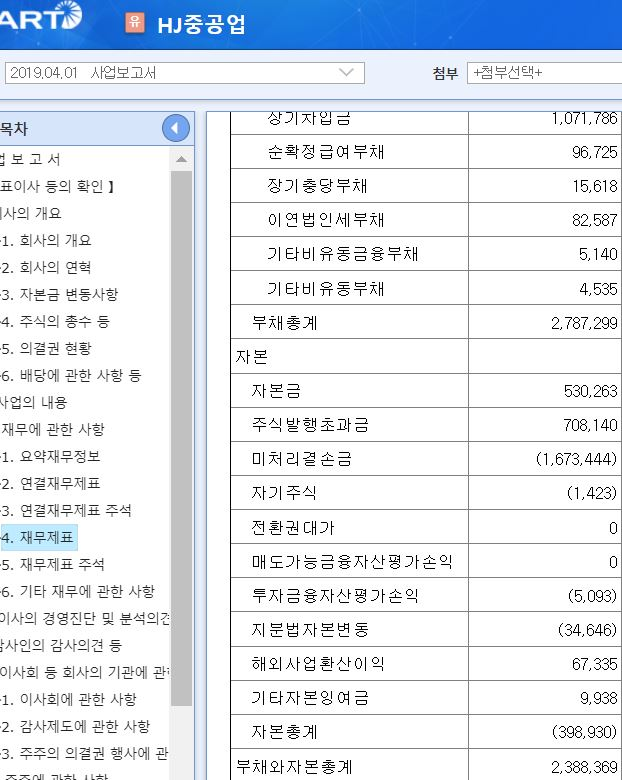#PER/PBR 등은 단순하게 구하는 것으로...
PER = 주가/당기순이익/유통주식수
PBR = 주가/자기자본/유통주식수
PCR = 주가/영업활동현금흐름/유통주식수
PSR = 주가/매출액/유통주식수

In [29]:
df[['종가(원)','당기순이익','발행주식수']]

,종가(원),당기순이익,발행주식수
0,785.0,-1.508282e+09,43693200.0
1,1330.0,-6.660149e+09,66025540.0
2,932.0,2.961810e+08,86626866.0
3,912.0,1.580390e+08,86626866.0
4,2110.0,-3.650091e+09,88297244.0
...,...,...,...
25120,402.0,-8.654016e+10,175643430.0
25121,481.0,-5.135655e+10,112112392.0
25122,258.0,-5.087646e+10,116732559.0
25123,2700.0,1.643649e+10,240424899.0


In [30]:
# 계산량이 매우 많아 시간이 필요
# 레이블 초기화
df['매출액증가율'] = 0
df['영업이익증가율'] = 0
df['순이익증가율'] = 0
df['총자본증가율'] = 0
df['유동자산증가율'] = 0
df['비유동자산증가율'] = 0
df['유형자산증가율'] = 0
df['PER'] = 0
df['PBR'] = 0
df['PCR'] = 0
df['PSR'] = 0
# 회사명으로 그룹화하여 각 회사별로 처리
# company는 회사명 : 예를들면 (A회사), group은 'A회사'의 데이터 전부
for company, group in df.groupby('회사명'):
    for i in range(len(group)):
        if i >= 1:
            group['매출액증가율'].iloc[i] = (group['매출액'].iloc[i] - group['매출액'].iloc[i-1]) / (group['매출액'].iloc[i-1])
            group['영업이익증가율'].iloc[i] = (group['영업이익'].iloc[i] - group['영업이익'].iloc[i-1]) / group['영업이익'].iloc[i-1]
            group['순이익증가율'].iloc[i] = (group['당기순이익'].iloc[i] - group['당기순이익'].iloc[i-1]) / group['당기순이익'].iloc[i-1]
            group['총자본증가율'].iloc[i] = (group['자산'].iloc[i] - group['자산'].iloc[i-1]) / group['자산'].iloc[i-1]
            group['유동자산증가율'].iloc[i] = (group['유동자산'].iloc[i] - group['유동자산'].iloc[i-1]) / group['유동자산'].iloc[i-1]
            group['비유동자산증가율'].iloc[i] = (group['비유동자산'].iloc[i] - group['비유동자산'].iloc[i-1]) / group['비유동자산'].iloc[i-1]
            group['유형자산증가율'].iloc[i] = (group['유형자산'].iloc[i] - group['유형자산'].iloc[i-1]) / group['유형자산'].iloc[i-1]

            group['PER'].iloc[i] = (group['종가(원)'].iloc[i]) / ((group['당기순이익'].iloc[i]) / (group['발행주식수'].iloc[i]))
            group['PBR'].iloc[i] = (group['종가(원)'].iloc[i]) / (((group['자본'].iloc[i]+group['자본'].iloc[i-1])/2) / group['발행주식수'].iloc[i])
            group['PSR'].iloc[i] = (group['종가(원)'].iloc[i]) / ((group['매출액'].iloc[i]) / (group['발행주식수'].iloc[i]))
            group['PCR'].iloc[i] = (group['종가(원)'].iloc[i]) / ((group['영업활동으로 인한 현금흐름'].iloc[i]) / (group['발행주식수'].iloc[i]))

    df.loc[group.index[1:]] = group.iloc[1:]

<ipython-input-30-d193bb2bc59b>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['매출액증가율'].iloc[i] = (group['매출액'].iloc[i] - group['매출액'].iloc[i-1]) / (group['매출액'].iloc[i-1])
<ipython-input-30-d193bb2bc59b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['영업이익증가율'].iloc[i] = (group['영업이익'].iloc[i] - group['영업이익'].iloc[i-1]) / group['영업이익'].iloc[i-1]
<ipython-input-30-d193bb2bc59b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [46]:
# 각 그룹의 맨 첫행을 삭제, 왜냐하면 첫행은 증가율 자료가 없기 때문
import pandas as pd
grouped = df.groupby('회사명')
group_list = [group.iloc[1:] for _, group in grouped]
new_df = pd.concat(group_list)
df = new_df.copy()

In [47]:
# 확인해보기
df[['회사명','회계년도','매출액증가율','PER']]

,회사명,회계년도,매출액증가율,PER
1,(주)CMG제약,2012/12,-0.084291,-13.184986
2,(주)CMG제약,2013/12,0.255100,272.590879
3,(주)CMG제약,2014/12,0.115206,499.900036
4,(주)CMG제약,2015/12,0.188520,-51.041792
5,(주)CMG제약,2016/12,0.219213,200.063682
...,...,...,...,...
25120,흥아해운(주),2018/12,-0.098708,-0.815906
25121,흥아해운(주),2019/12,-0.864476,-1.050033
25122,흥아해운(주),2020/12,-0.129474,-0.591963
25123,흥아해운(주),2021/12,-0.081118,39.494264


In [49]:
df[['PER','PBR','PSR','PCR']].value_counts()

PER            PBR       PSR       PCR       
-28141.263679  0.404132  1.067648  -13.571734    1
 15.906926     0.738921  0.663112   16.008047    1
 15.928925     0.491014  0.557626   29.998284    1
 15.927432     1.201411  2.166723   9.209927     1
 15.926171     0.426722  0.698900   13.546794    1
                                                ..
 3.325897      0.467074  0.313534   5.006505     1
 3.324828      0.524345  0.165081   1.264339     1
 3.317827      0.443910  0.370696   7.735311     1
 3.317097      0.332605  0.679717  -6.774687     1
 34185.527559  0.769498  0.294246   1.977144     1
Length: 19538, dtype: int64

In [50]:
df[['PER','PBR','PSR','PCR']].describe()
# PBR의 경우 음수가 왜나오는지? => 이상치에 가까움

,PER,PBR,PSR,PCR
count,19667.000000,19538.000000,1.966700e+04,19667.000000
mean,21.070240,2.031972,inf,13.447388
std,477.210275,6.456678,NaN,2091.788961
min,-28141.263679,-76.551749,6.846895e-03,-127070.502705
25%,-3.936991,0.689903,3.990680e-01,-4.071846
50%,9.428178,1.196261,8.736717e-01,8.135802
75%,21.414444,2.214315,2.040569e+00,20.055035
max,34185.527559,761.516650,inf,223297.287413


In [52]:
# PBR < 0은  자본이 음수인듯, 굉장한 부실화됨
#HJ중공업의 18/12 사업보고서를 살펴보니 실제로 그 해에 자본이 음수였음
df[df['PBR'] < 0]

,회사명,거래소코드,회계년도,종가(원),발행주식수,매출액,영업이익,당기순이익,자산,자본,...,영업이익증가율,순이익증가율,총자본증가율,유동자산증가율,비유동자산증가율,유형자산증가율,PER,PBR,PCR,PSR
43,(주)HJ중공업,97230,2018/12,1655.0,106052508.0,1.697869e+12,1.924500e+10,-1.283647e+12,2.733620e+12,-7.081860e+11,...,-1.069232,3.617801,-0.350168,-0.091468,-0.562068,-0.643610,-0.136733,-2.679893,0.963764,0.103375
44,(주)HJ중공업,97230,2019/12,4985.0,83274281.0,1.628751e+12,-3.534100e+10,3.061690e+11,2.470222e+12,2.449940e+11,...,-2.836373,-1.238515,-0.096355,-0.244271,0.154999,-0.037021,1.355860,-1.792442,2.951792,0.254872
111,(주)STX,11810,2014/12,375.0,29845269.0,1.634606e+12,3.581830e+11,3.805840e+11,1.255002e+12,9.366200e+10,...,-1.239262,-1.238516,-0.065189,0.126011,-0.341622,-0.498492,0.029407,-0.053807,-0.142460,0.006847
113,(주)STX,11810,2016/12,1660.0,47331679.0,1.720153e+12,-4.574460e+11,-4.574460e+11,7.077090e+11,-3.305960e+11,...,8.339063,8.339063,-0.441528,-0.460884,-0.393703,-0.275172,-0.171759,-0.608475,2.483425,0.045677
114,(주)STX,11810,2017/12,23850.0,19133430.0,1.803878e+12,3.343860e+11,3.343860e+11,6.275420e+11,4.256000e+10,...,-1.730985,-1.730985,-0.113277,-0.021715,-0.314444,-0.040087,1.364687,-3.168578,4.862669,0.252973
1924,(주)동양,1520,2013/12,290.0,255327995.0,5.676499e+11,-5.909576e+11,-6.702735e+11,1.124606e+12,-4.764399e+11,...,3.091318,3.668688,-0.669367,-0.286463,-0.807450,-0.860347,-0.110470,-0.612394,1.534184,0.130442
1925,(주)동양,1520,2014/12,895.0,236554820.0,3.812198e+11,4.849614e+11,6.320189e+11,8.304476e+11,3.749529e+11,...,-1.820637,-1.942927,-0.261566,-0.526608,0.092627,-0.020545,0.334985,-4.172288,3.903951,0.555366
2888,(주)마음에이아이,377480,2021/12,31250.0,6044583.0,8.244247e+09,1.652215e+09,1.478841e+09,3.538495e+10,2.981235e+10,...,-1.080545,-1.072542,0.567446,0.602173,0.512041,6.549187,127.730580,-15.212494,-27.537972,22.912125
3566,(주)베스파,299910,2022/12,3165.0,8206916.0,5.478776e+09,-4.700802e+09,-4.700802e+09,1.473202e+09,-9.382086e+09,...,-0.880308,-0.880308,-0.875438,-0.896436,-0.790749,-0.927489,-5.525629,-3.531762,-8.288589,4.741002
3968,(주)비츠로시스,54220,2019/03,485.0,52295547.0,3.126624e+10,-1.163872e+11,-1.163872e+11,1.870100e+10,-9.952776e+10,...,4.376811,4.376811,-0.825514,-0.884973,-0.779334,-1.000000,-0.217922,-1.036416,-2.032877,0.811205


In [17]:
# PBR은 괜찮지만
# PER,PCR, PSR은 음수인 경우 숫자가 왜곡될 수 있음을 기억해야한다. 그래서 처리 방법에 대하여 논의하여야한다.
# PER의 경우 예를들면 주가 100억 / (당기순이익= -10억  / 주식수= 1이라고 치자, PER = -10인데, 당기순이익 = -1억이라면, 오히려 PER이 매우 작아진다. PER = -100)

In [53]:
df.to_csv('/content/drive/MyDrive/프로젝트2/일부피쳐조정.csv', encoding = 'cp949', index=True)